# Headers and status code
Hasta ahora, solo enviamos un mensaje de solicitud a un servidor y procesamos la respuesta. Además de lo anterior, podemos dar instrucciones específicas al servidor.

## Request and response anatomy
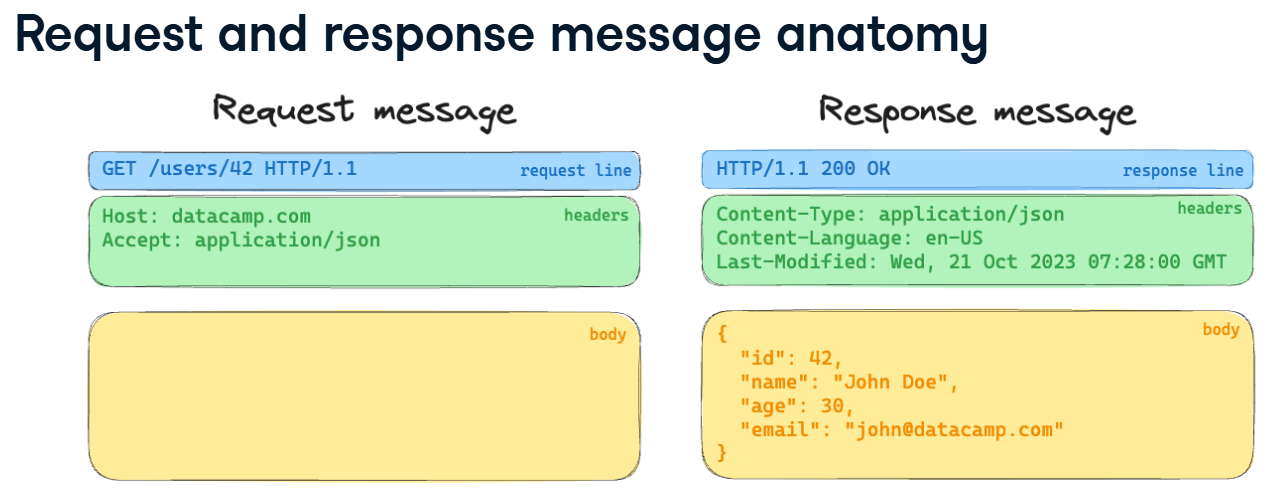

Al examinar una solicitud **GET** y un mensaje de respuesta, vemos que ambos mensajes son muy similares en estructura y se pueden dividir en tres partes distintas.

1. Linea de salida:
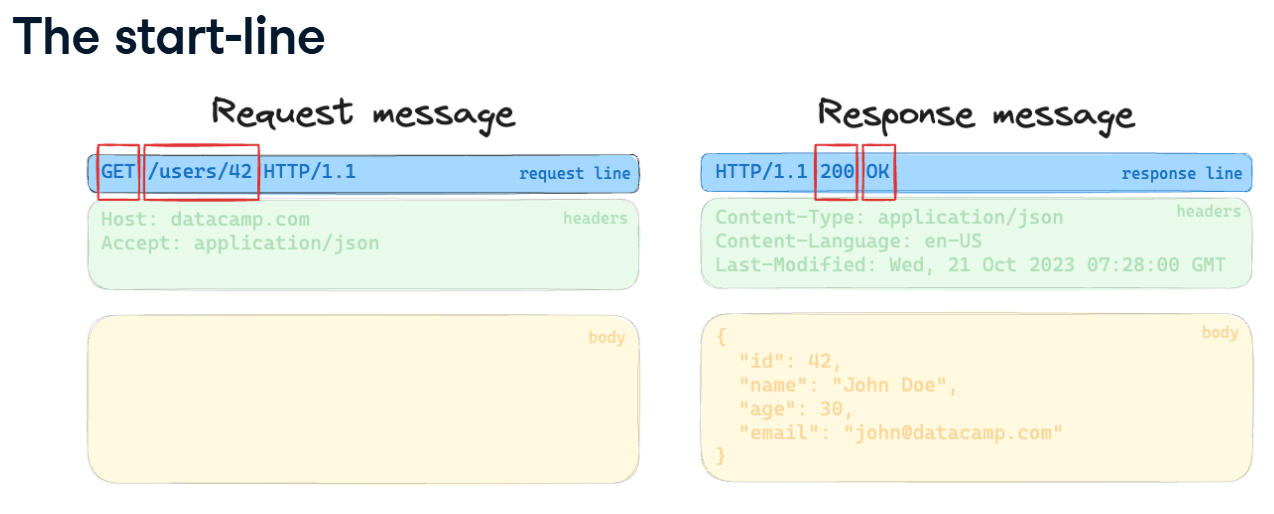
Para los mensajes de solicitud (request message) se conoce como línea de solicitud. Contiene el tipo de solicitud junto con la ruta a la que se debe entregar el mensaje. En los mensajes de respuesta (response message) la línea de inicio se llama línea de estado y contiene un código de estado numérico de tres dígitos y un mensaje de estado.

Hay más de 70 códigos de estado, agrupados en cinco categorías:
* 1XX: Informational responses
* 2XX: Successful responses
* 3XX: Redirection messages
* 4XX: Client error responses
* 5XX: Server error responses

Los más importantes para recordar son los "200 OK", que indica que el servidor tiene procesada correctamente la solicitud. "404 Not Found" para indicar que el recurso que estamos solicitando no existe. "500  Internal Server Error" que indica que hubo un error en el servidor.

2. Headers:
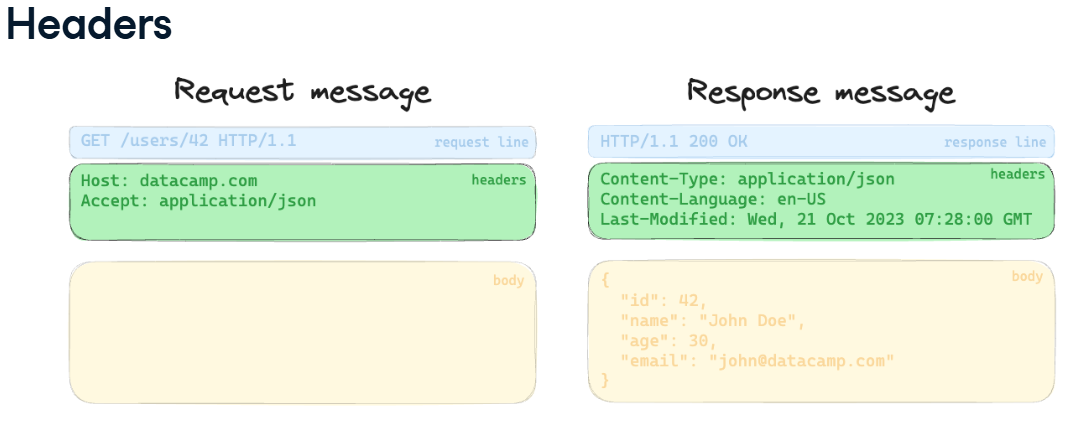
Los encabezados contienen información que describe el mensage o los datos que se envían o reciben, como el timpo de contenido o la fecha de última modificación de recurso soicitado. Siempre tienen el formato de *Clave-Valor* separados por dos puntos. Cada encabezado comienza con una clave que nos distingue entre mayúsculas y minúsculas, seguida de dos puntos y luego el valor de ese encabezado.

Ejemplo:
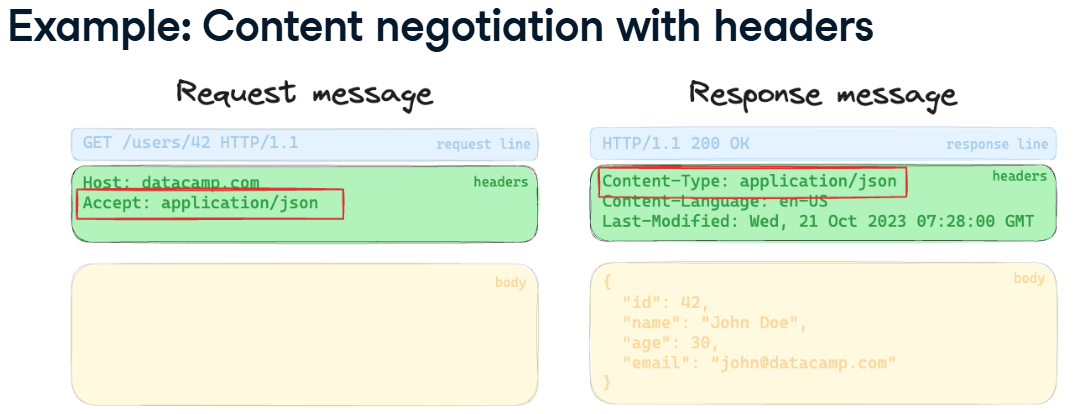
Para comunicarse, el cliente y servidor utilizan mensajes encabezados para acordar el lenguaje que utilizan en e intercambio de información. Lo anterior se llama negociación de contenidos.
* En la imagen, el cliente envía el encabezado "Accept" para informar al servidor que puede aceptar una respuesta en formato JSON.
* Cuando el servidor responde, incluye el encabezado de tipo de contenido para que el cliente sepa qué formato respondió.

El paquete **requests** de Python nos permite agregar y leer encabezados:

In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
response = requests.get(
    'https://api.github.com',
    headers={'Accept': 'application/json'})
print(response.json())

{'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'following_url': 'https://api.github.com/user/following{/target}', 'gists_url': 'https://api.github.com/gists{/gist_id}', 'hub_url': 'https://api.github.com/hub', 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}', 'issues_url': 'https://api.github.com/issues', 'keys_url': 'https://api.git

Cada método de solicitud como **get** y **post** acepta un parámetro de encabezados adicionales como pares *Clave-Valor* en forma de diccionario. Con ese parámetro podemos agregar tantos encabezados como queramos a nuestra solicitud.

Podemos acceder a encabezados de respuesta individuales mediante el subconjunto del diccionario usando corchetes o con el método ger en el diccionario:

In [3]:
response.headers['content-type']

'application/json; charset=utf-8'

In [4]:
response.headers.get('content-type')

'application/json; charset=utf-8'

## Status codes with requests
Cada objeto ```response``` tiene un atributo de código de estado con el valor numérico del código de estado:

In [5]:
response = requests.get('https://api.github.com')
response.status_code == 200

True

In [6]:
response = requests.get('https://api.github.com')
response.status_code == requests.codes.not_found

False

## Response codes and APIs
Cuando un cliente envía una petición a un servidor, la respuesta del servidor incluye un código de estado numérico, que se utiliza para indicar al cliente cómo ha respondido el servidor a la petición.

En este ejercicio aprenderás los códigos de estado más importantes que debes conocer. Enviaremos peticiones a rutas válidas e inválidas y aprenderemos cómo podemos acceder al código de estado para determinar si nuestra petición ha tenido éxito o no.

El paquete requests viene con un objeto de búsqueda de códigos de estado incorporado ```requests.codes``` que puede utilizar cuando no recuerde los valores numéricos exactos.

### Instrucciones
1. Check if the server responded successfully with the 200 status code.

In [ ]:
response = requests.get('http://localhost:3000/lyrics')

# Check the response status code
if (response.status_code == 200):
  print('The server responded succesfully!')

```cmd

response = requests.get('http://localhost:3000/lyrics')

#Check the response status code
if (response.status_code == 200):
  print('The server responded succesfully!')
  
The server responded succesfully!

```

2. Realiza una petición a la ruta inexistente ```/movies``` de la API del catálogo de música.
Comprueba si el servidor respondió con un código de estado que indique que no se encontró el recurso, proporcionando el código de estado numérico apropiado que lo represente.

In [ ]:
# Make a request to the movies endpoint of the API
response = requests.get('http://localhost:3000/movies')

if (response.status_code == 200):
  print('The server responded succesfully!')

# Check the response status code
elif (response.status_code == 404):
  print('Oops, that API could not be found!')

```cmd
# Make a request to the movies endpoint of the API
response = requests.get('http://localhost:3000/movies')

if (response.status_code == 200):
  print('The server responded succesfully!')
  
# Check the response status code
elif (response.status_code == requests.codes.not_found):
  print('Oops, that API could not be found!')

Oops, that API could not be found!
```

3. Compruebe los códigos de respuesta con un código de estado ```200 OK``` y ```404 Not Found``` utilizando el objeto de búsqueda requests.codes.

In [ ]:
response = requests.get('http://localhost:3000/movies')

# Check if the response.status_code is equal to the requests.codes value for "200 OK"
if (response.status_code == requests.codes.ok):
  print('The server responded succesfully!')
  
# Or if the request was not successful because the API did not exist
elif (response.status_code == requests.codes.not_found):
  print('Oops, that API could not be found!')

```cmd
response = requests.get('http://localhost:3000/movies')

# Check if the response.status_code is equal to the requests.codes value for "200 OK"
if (response.status_code == requests.codes.ok):
  print('The server responded succesfully!')
  
# Or if the request was not successful because the API did not exist
elif (response.status_code == requests.codes.not_found):
  print('Oops, that API could not be found!')
Oops, that API could not be found!

<script.py> output:
    Oops, that API could not be found!
```

## Using request and response headers
Las cabeceras contienen información adicional sobre las llamadas a la API, incluido el formato de respuesta deseado o utilizado. Utilizando las cabeceras ```accept``` y ```content-type```, el cliente y el servidor pueden negociar qué formato de respuesta utilizar.

En este ejercicio, utilizarás las cabeceras para inspeccionar los formatos de respuesta después de realizar una petición y realizar una nueva petición especificando el formato deseado a través de la cabecera accept.

### Instrucciones
1. Averigüe el tipo de contenido de la respuesta imprimiendo la cabecera ```content-type``` de la respuesta.

In [ ]:
response = requests.get('http://localhost:3000/lyrics')

# Print the response content-type header
print(response.headers['content-type'])

```cmd
response = requests.get('http://localhost:3000/lyrics')

# Print the response content-type header
print(response.headers['content-type'])
text/plain; charset=utf-8
```

2. Averigüe con qué tipos de contenido puede responder el servidor imprimiendo la cabecera ```accept``` de la respuesta.

In [ ]:
response = requests.get('http://localhost:3000/lyrics')

# Print the response accept header
print(response.headers['Accept'])

```cmd
response = requests.get('http://localhost:3000/lyrics')

# Print the response accept header
print(response.headers['Accept'])
application/json, text/plain
```

3. Añade una cabecera ```accept``` a la petición para que el servidor devuelva datos con formato JSON, luego imprime el atributo de texto de la respuesta.

In [ ]:
# Set the content type to application/json
headers = {'accept': 'application/json'}
response = requests.get('http://localhost:3000/lyrics', headers=headers)

# Print the response's text
print(response.text)

```cmd
<script.py> output:
    application/json, text/plain
# Set the content type to application/json
headers = {'accept': 'application/json'}
response = requests.get('http://localhost:3000/lyrics', headers=headers)

# Print the response's text
print(response.text)
{"artist":"AC/DC","lyric":"N' I never miss Cause I'm a problem child","track":"Problem Child"}
```

## Handling content-types errors
¿Qué ocurre cuando pides una respuesta en un formato específico pero el servidor no puede satisfacer esa petición? Digamos que quieres recibir la respuesta en XML en lugar de JSON. Si el servidor no puede responder en XML, responderá con un código de estado específico indicando que no puede responder en el formato solicitado. El código de estado utilizado en este caso es ```406 Not Acceptable``` o ```406```. La respuesta del servidor también suele contener una cabecera accept que incluye una lista de todos los formatos de respuesta con los que puede responder. Utilícela para saber con qué tipos de contenido puede responder la API.

### Instrucciones
* Añade una cabecera accept para solicitar al servidor una respuesta en el tipo de contenido application/xml.
* Comprobar si el servidor no ha aceptado la solicitud utilizando el código de estado correspondiente.
* Imprime una lista de los tipos de contenido aceptados a partir de la respuesta del servidor.

In [ ]:
# Add a header to use in the request
headers = {'accept': 'application/xml'}
response = requests.get('http://localhost:3000/lyrics', headers=headers)

# Check if the server did not accept the request
if (response.status_code == 406):
  print('The server can not respond in XML')
  # Print the accepted content types
  print('These are the content types the server accepts: ' + response.headers['accept'])
else:
  print(response.text)

```cmd
# Add a header to use in the request
headers = {'accept': 'application/xml'}
response = requests.get('http://localhost:3000/lyrics', headers=headers)

# Check if the server did not accept the request
if (response.status_code == 406):
  print('The server can not respond in XML')
  # Print the accepted content types
  print('These are the content types the server accepts: ' + response.headers['accept'])
else:
  print(response.text)
The server can not respond in XML
These are the content types the server accepts: application/json, text/plain
```